<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/MLnow_2.0/blob/main/3_1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Univariate Linear Regression`

[Link to download the Dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created** :June 6,2021

**AUTHOR**: Sai Vamshi Katkuri
[Assessment Repository](https://github.com/SaiVamshiKatkuri/MLnow_2.0)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

**Changes** : Used Simple Linear Regression as well as Support Vector Machines




## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Datasets'

/content/drive/MyDrive/Datasets


In [3]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv  w-h.csv


In [4]:
import os

In [5]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [6]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [7]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [8]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [9]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [10]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv  w-h.csv


## Data visualization

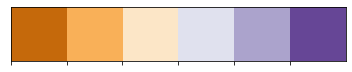

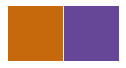

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [12]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

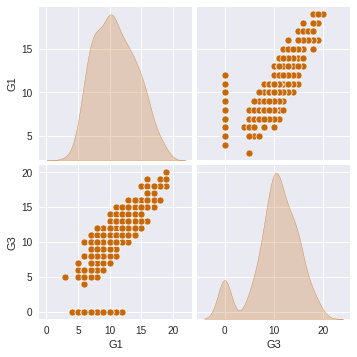

In [13]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [14]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [15]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [16]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [17]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [18]:
print(trainLabels.describe())

count    316.000000
mean      10.303797
std        4.575586
min        0.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64


In [19]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [20]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [21]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [22]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 21ms/step - loss: 12.5684 - mae: 12.5684 - mse: 184.2562 - val_loss: 13.2035 - val_mae: 13.2035 - val_mse: 201.2973
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 12.4508 - mae: 12.4508 - mse: 181.0531 - val_loss: 13.0789 - val_mae: 13.0789 - val_mse: 197.7084
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 12.3337 - mae: 12.3337 - mse: 177.8827 - val_loss: 12.9542 - val_mae: 12.9542 - val_mse: 194.1485
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 12.2154 - mae: 12.2154 - mse: 174.6603 - val_loss: 12.8300 - val_mae: 12.8300 - val_mse: 190.6355
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 12.0984 - mae: 12.0984 - mse: 171.5806 - val_loss: 12.7054 - val_mae: 12.7054 - val_mse: 187.1438
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 11.9804 - mae: 11.9804 - mse: 168.4356 - val_loss: 12.5810 - val_mae: 1

In [23]:
print(history)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


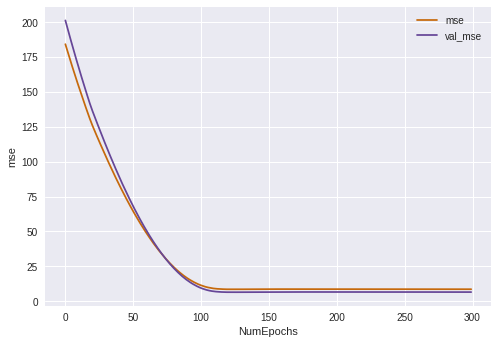

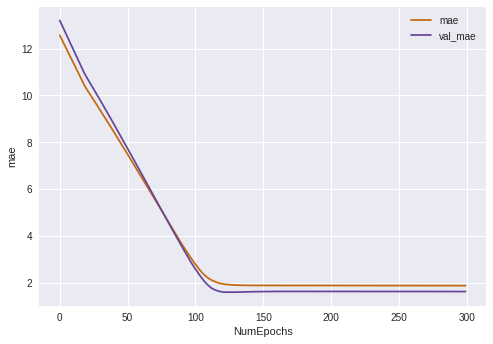

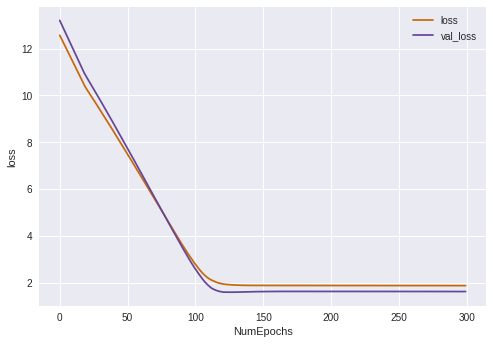

In [25]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [26]:
model.predict([1])

array([[1.8429775]], dtype=float32)

In [27]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.8429775]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.8429775]
 [2.766572 ]
 [3.6901665]
 [4.613761 ]
 [5.5373554]]

List of Predictions (flattened out):
[1.8429775 2.766572  3.6901665 4.613761  5.5373554]



In [28]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [29]:
testPreds = model.predict(testFeatures)
testPreds_Array=testPreds.flatten() #array of all prediction values

In [30]:
print(len(testPreds_Array))
print(testPreds_Array)

79
[13.849706   6.46095   11.078922  16.62049   16.62049   12.002517
 13.849706  18.467678  18.467678   8.308139  13.849706  12.926111
  8.308139   7.3845444  9.231733  12.926111  11.078922  15.696895
  7.3845444 10.155328  14.7733    12.926111  13.849706  15.696895
  7.3845444  7.3845444  8.308139  10.155328  12.002517  10.155328
 12.002517  12.926111  10.155328   6.46095    9.231733  12.002517
  7.3845444  8.308139  13.849706   9.231733   9.231733   7.3845444
 12.002517   6.46095   12.926111   7.3845444  7.3845444 11.078922
 12.926111  16.62049   12.002517  14.7733     9.231733  12.002517
 14.7733    12.002517  14.7733    12.002517  14.7733    11.078922
 12.002517   8.308139  15.696895   7.3845444 15.696895  11.078922
 15.696895  12.926111   8.308139   8.308139  12.002517  17.544083
 12.926111  15.696895  10.155328   7.3845444 10.155328   7.3845444
 11.078922 ]


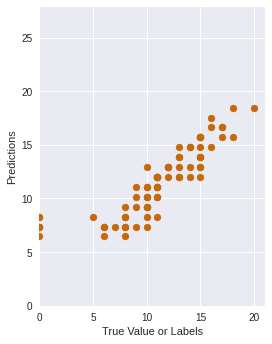

In [31]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds_Array)

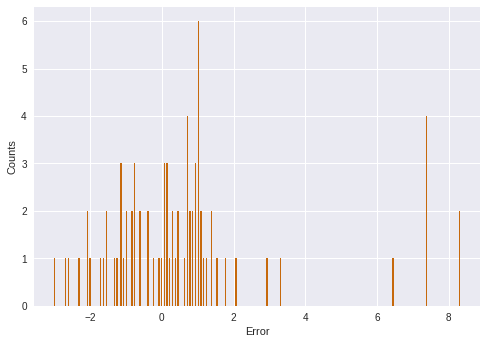

In [32]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds_Array, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions

# Using Other models on the dataset

## Simple Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(trainFeatures, trainLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
testPreds_LR = regressor.predict(testFeatures)
testPreds_LR_Array=testPreds_LR.flatten()   #Flattening to 1d array

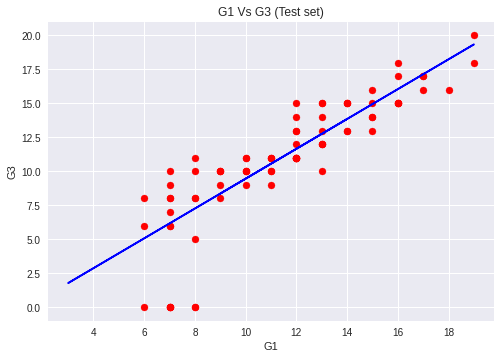

In [35]:
plt.grid(True)
plt.scatter(testFeatures, testLabels, color = 'red')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'blue')
plt.title('G1 Vs G3 (Test set)')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

#Support Vector Machine

In [36]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel = 'rbf')
SVM_regressor.fit(trainFeatures, trainLabels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
testPreds_SVM=SVM_regressor.predict(testFeatures)
testPreds_SVM_Array=testPreds_SVM.flatten()

In [38]:
CompareModels_df=pd.DataFrame({'testLabels':testLabels,'testPreds':testPreds_Array,'testPreds_LR':testPreds_LR_Array,'testPreds_SVM':testPreds_SVM_Array})
print(CompareModels_df.head(15))

    testLabels  testPreds  testPreds_LR  testPreds_SVM
9           15  13.849706     13.850873      13.841499
25           8   6.460950      5.068301       6.099613
28          11  11.078922     10.557408      10.900065
31          17  16.620489     17.144337      17.308386
32          16  16.620489     17.144337      17.308386
38          11  12.002517     11.655230      11.922990
39          13  13.849706     13.850873      13.841499
42          18  18.467678     19.339980      17.531246
47          20  18.467678     19.339980      17.531246
53          11   8.308139      7.263944       8.162019
57          15  13.849706     13.850873      13.841499
70          15  12.926111     12.753051      12.900435
72           5   8.308139      7.263944       8.162019
82           6   7.384544      6.166122       7.057937
84          10   9.231733      8.361765       9.100437


In [39]:
Errors_df=pd.DataFrame({'PerceptronError':abs(testLabels-testPreds_Array),'LR_Error':abs(testLabels-testPreds_LR_Array),'SVM_Error':abs(testLabels-testPreds_SVM_Array)})
print(Errors_df.head(15))

    PerceptronError  LR_Error  SVM_Error
9          1.150294  1.149127   1.158501
25         1.539050  2.931699   1.900387
28         0.078922  0.442592   0.099935
31         0.379511  0.144337   0.308386
32         0.620489  1.144337   1.308386
38         1.002517  0.655230   0.922990
39         0.849706  0.850873   0.841499
42         0.467678  1.339980   0.468754
47         1.532322  0.660020   2.468754
53         2.691861  3.736056   2.837981
57         1.150294  1.149127   1.158501
70         2.073889  2.246949   2.099565
72         3.308139  2.263944   3.162019
82         1.384544  0.166122   1.057937
84         0.768267  1.638235   0.899563


# Rsquared test

In [41]:
r2_score_LR=regressor.score(testFeatures,testLabels)
print(r2_score_LR*100)

73.2702363266345


In [42]:
r2_score_SVM=SVM_regressor.score(testFeatures,testLabels)
print(r2_score_SVM*100)

69.88915230248718


` The model is performing well on Simple Linear Regression then SVM`